In [7]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

[[5.96242338]]


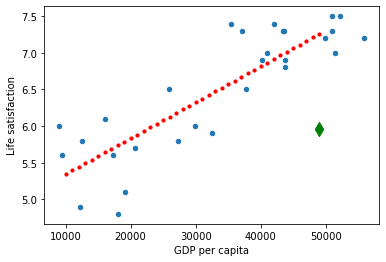

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# 데이터 적재
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',') 
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter='\t', 
                            encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X,y)

# 키프로스에 대한 예측 만들기
X_new = [[22587]]
print(model.predict(X_new))

#모델 예측 시각화
for x in range(10, 50):
    plot_x = 1000 * x
    plot_y = float(model.predict([[plot_x]]))
    plt.scatter(plot_x, plot_y, s=10, color='r')

# 키프로스에 대한 예측 시각화
plot_y = float(model.predict(X_new))
plt.scatter(plot_x, plot_y, s=100, color='g', marker='d')
plt.show()

[[5.76666667]]


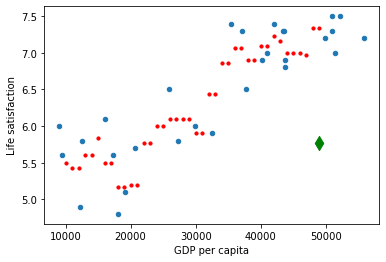

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

# 데이터 적재
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',') 
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter='\t', 
                            encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

# k-최근접 이웃 모델 선택
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
model.fit(X,y)

# 키프로스에 대한 예측 만들기
X_new = [[22587]]
print(model.predict(X_new))

#모델 예측 시각화
for x in range(10, 50):
    plot_x = 1000 * x
    plot_y = float(model.predict([[plot_x]]))
    plt.scatter(plot_x, plot_y, s=10, color='r')

# 키프로스에 대한 예측 시각화
plot_y = float(model.predict(X_new))
plt.scatter(plot_x, plot_y, s=100, color='g', marker='d')
plt.show()